In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
data= pd.read_csv('C:/Users/charl/Downloads/EDA_final.csv', index_col=0)
data.head()

,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
3497,2,4,moderate,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
14495,7,5,vigorous,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
14969,8,3,light,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
10111,5,5,vigorous,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,0.219553,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
2422,2,2,light,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,0.001171,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660


In [27]:
data.isna().sum()

sub_id              0
activity_id         0
act_level           0
hand_acc_x_mean     0
hand_acc_x_std      0
hand_acc_y_mean     0
hand_acc_y_std      0
hand_acc_z_mean     0
hand_acc_z_std      0
hand_gyr_x_mean     0
hand_gyr_x_std      0
hand_gyr_y_mean     0
hand_gyr_y_std      0
hand_gyr_z_mean     0
hand_gyr_z_std      0
chest_acc_x_mean    0
chest_acc_x_std     0
chest_acc_y_mean    0
chest_acc_y_std     0
chest_acc_z_mean    0
chest_acc_z_std     0
chest_gyr_x_mean    0
chest_gyr_x_std     0
chest_gyr_y_mean    0
chest_gyr_y_std     0
chest_gyr_z_mean    0
chest_gyr_z_std     0
ankle_acc_x_mean    0
ankle_acc_x_std     0
ankle_acc_y_mean    0
ankle_acc_y_std     0
ankle_acc_z_mean    0
ankle_acc_z_std     0
ankle_gyr_x_mean    0
ankle_gyr_x_std     0
ankle_gyr_y_mean    0
ankle_gyr_y_std     0
ankle_gyr_z_mean    0
ankle_gyr_z_std     0
dtype: int64

In [28]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['act_level'] = le.fit_transform(data['act_level'])

In [29]:
data

,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
3497,2,4,1,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
14495,7,5,2,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
14969,8,3,0,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
10111,5,5,2,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,0.219553,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
2422,2,2,0,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,0.001171,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,0,-4.306831,0.087374,1.634235,0.082474,8.393767,0.110314,-0.003882,...,-1.152508,0.070008,-2.747617,0.101630,0.011747,0.025758,-0.006416,0.025480,0.003831,0.015409
4870,3,2,0,-1.545991,0.086820,3.379703,0.093813,8.981813,0.103787,-0.011143,...,0.691999,0.070985,1.310246,0.109423,0.014554,0.024818,-0.000330,0.024905,0.006282,0.016639
11822,6,4,1,-10.034760,1.780491,3.100475,1.319988,1.092313,0.994165,0.060559,...,1.075183,8.284333,-2.815136,3.539439,-0.071975,1.670458,-0.017743,0.454644,0.204427,2.938931
3866,2,4,1,-8.275569,3.245008,6.196727,4.417230,2.372815,1.843274,0.081074,...,0.477373,11.093323,-2.393269,4.751164,0.004726,1.932653,-0.326306,0.950371,0.105722,3.513709


In [30]:
sample_data = data.sample(frac=0.5)

In [31]:

sample_data

,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
4825,3,2,0,-1.234039,0.474794,3.693128,1.280536,8.762998,1.167749,-0.199346,...,0.698214,0.081528,1.287827,0.117425,0.011842,0.026497,-0.001082,0.025062,0.006166,0.015869
4521,3,1,0,8.445492,0.074402,-1.783191,0.090270,4.630836,0.115366,-0.005930,...,-9.807958,0.066407,0.646000,0.102116,0.008578,0.024483,-0.001328,0.022914,0.007481,0.015143
6291,4,2,0,-2.500587,0.072761,6.408269,0.069100,6.875370,0.112020,-0.001815,...,1.839839,0.067506,-0.533230,0.101066,0.004442,0.026116,-0.002782,0.023679,0.005044,0.015720
2600,2,3,0,-8.690348,0.103883,4.508191,0.093622,0.225612,0.135334,-0.000712,...,-1.622797,0.081668,-1.438249,0.111200,0.000733,0.028311,-0.013167,0.024769,0.005066,0.022225
14070,7,4,1,-0.937685,3.697538,9.785932,9.246481,1.862641,2.388767,0.016759,...,1.567850,10.327288,-4.339531,4.598397,0.021230,1.693815,-0.170703,1.063443,0.102736,3.190345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6516,4,3,0,-8.624885,0.191770,3.908028,0.273727,2.294194,0.315187,-0.021354,...,0.912809,0.194030,-2.993225,0.121316,0.007966,0.036864,-0.006187,0.029454,0.001846,0.036610
202,1,1,0,7.217077,0.077334,1.307541,0.089840,6.383703,0.113888,0.001650,...,-7.153920,0.061888,-7.219147,0.094788,0.006613,0.024063,-0.004799,0.022072,0.003225,0.016392
6352,4,2,0,-2.707742,0.076259,4.419764,0.081347,8.210849,0.091294,0.003897,...,1.758331,0.073775,-0.721085,0.101931,0.009280,0.025336,-0.002292,0.024769,0.006691,0.015258
15916,8,4,1,-11.022833,3.412902,-1.611982,1.399766,0.937619,1.457648,0.081694,...,-1.656416,9.083304,-3.647757,3.192098,0.149519,1.592427,0.017847,1.200949,0.224700,3.065416


In [32]:
X=sample_data.drop('activity_id',axis=1)
X.head()

,sub_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,hand_gyr_x_std,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
4825,3,0,-1.234039,0.474794,3.693128,1.280536,8.762998,1.167749,-0.199346,0.867060,...,0.698214,0.081528,1.287827,0.117425,0.011842,0.026497,-0.001082,0.025062,0.006166,0.015869
4521,3,0,8.445492,0.074402,-1.783191,0.090270,4.630836,0.115366,-0.005930,0.022445,...,-9.807958,0.066407,0.646000,0.102116,0.008578,0.024483,-0.001328,0.022914,0.007481,0.015143
6291,4,0,-2.500587,0.072761,6.408269,0.069100,6.875370,0.112020,-0.001815,0.021505,...,1.839839,0.067506,-0.533230,0.101066,0.004442,0.026116,-0.002782,0.023679,0.005044,0.015720
2600,2,0,-8.690348,0.103883,4.508191,0.093622,0.225612,0.135334,-0.000712,0.033896,...,-1.622797,0.081668,-1.438249,0.111200,0.000733,0.028311,-0.013167,0.024769,0.005066,0.022225
14070,7,1,-0.937685,3.697538,9.785932,9.246481,1.862641,2.388767,0.016759,0.777978,...,1.567850,10.327288,-4.339531,4.598397,0.021230,1.693815,-0.170703,1.063443,0.102736,3.190345


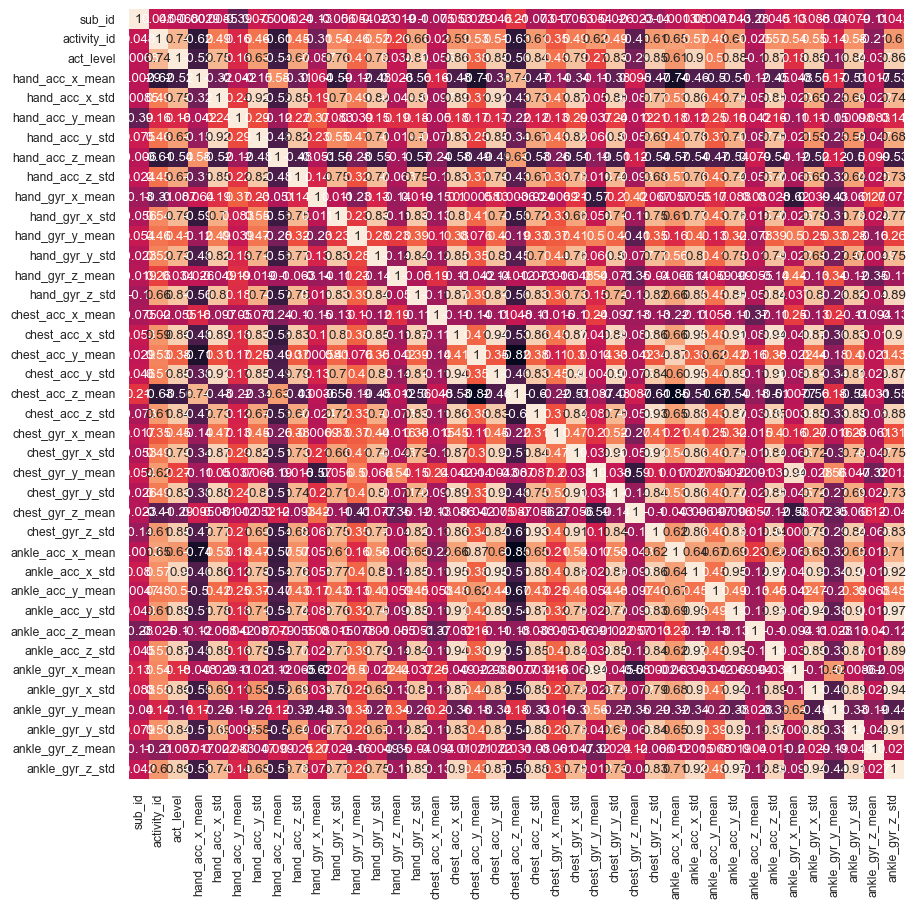

In [33]:

#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [49]:
X = sample_data.iloc[:,0:7].values
y = sample_data['activity_id']

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [50]:
X.shape

(3924, 7)

In [51]:
Y.shape

(3924, 7)

In [52]:
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(60,input_shape=(7,),activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.00048), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 60)                480       
                                                                 
 dense_13 (Dense)            (None, 60)                3660      
                                                                 
 dense_14 (Dense)            (None, 30)                1830      
                                                                 
 dense_15 (Dense)            (None, 7)                 217       
                                                                 
Total params: 6,187
Trainable params: 6,187
Non-trainable params: 0
_________________________________________________________________


C:\Users\charl\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [53]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
99/99 [==============================] - 1s 4ms/step - loss: 1.2589 - accuracy: 0.5766 - val_loss: 0.7928 - val_accuracy: 0.7962
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.8095 - val_loss: 0.4676 - val_accuracy: 0.8548
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8965 - val_loss: 0.2951 - val_accuracy: 0.9223
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9299 - val_loss: 0.2088 - val_accuracy: 0.9554
Epoch 5/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9478 - val_loss: 0.1732 - val_accuracy: 0.9643
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.9522 - val_loss: 0.1324 - val_accuracy: 0.9631
Epoch 7/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9579 - val_loss: 0.1173 - val_accuracy: 0.9694
Epoch 8/100
9

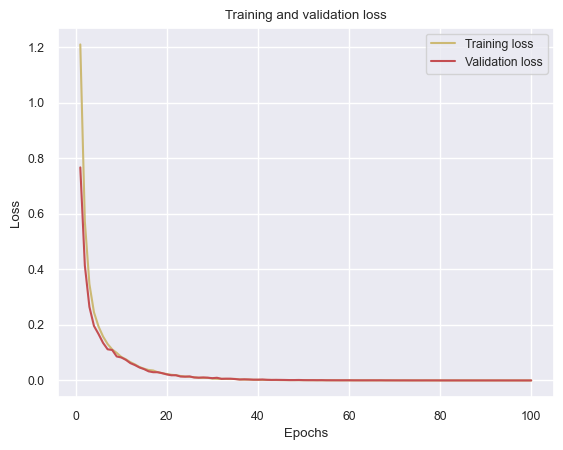

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

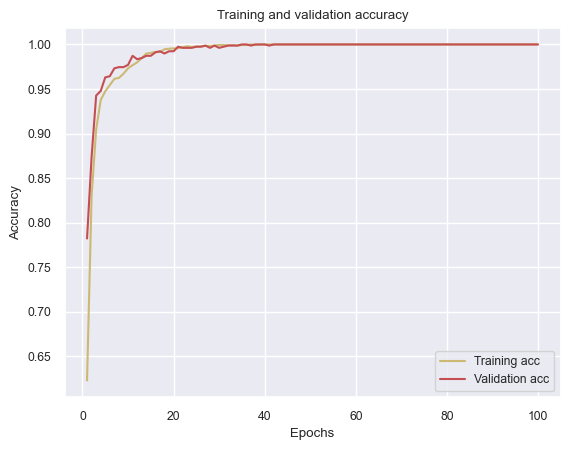

In [46]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_class, y_pred_class, average='macro')
recall = recall_score(y_test_class, y_pred_class, average='macro')
f1 = f1_score(y_test_class, y_pred_class, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

accuracy = np.sum(y_test_class == y_pred_class) / len(y_test_class)
print("Accuracy:", accuracy)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       106
           4       1.00      1.00      1.00       268
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        61

    accuracy                           1.00       785
   macro avg       1.00      1.00      1.00       785
weighted avg       1.00      1.00      1.00       785

[[ 44   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0]
 [  0   0 120   0   0   0   0]
 [  0   0   0 106   0   0   0]
 [  0   0   0   0 268   0   0]
 [  0   0   0   0   0  60   0]
 [  0   0   0   0   0   0  61]]
